<a href="https://colab.research.google.com/github/PRIYAANGADI/Cluster-analysis/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages('quantmod')
install.packages('dplyr')
install.packages('ggplot2')
install.packages('stats')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘stats’ is a base package, and should not be updated”


        Date CT.F.Close   Month
1 2024-01-02      79.94 2024-01
2 2024-01-03      80.93 2024-01
3 2024-01-04      80.12 2024-01
4 2024-01-05      80.19 2024-01
5 2024-01-08      80.42 2024-01
6 2024-01-09      80.73 2024-01
'data.frame':	247 obs. of  3 variables:
 $ Date      : Date, format: "2024-01-02" "2024-01-03" ...
 $ CT.F.Close: num  79.9 80.9 80.1 80.2 80.4 ...
 $ Month     : chr  "2024-01" "2024-01" "2024-01" "2024-01" ...
# A tibble: 12 × 2
   Month   AveragePrice
   <chr>          <dbl>
 1 2024-01         82.6
 2 2024-02         92.8
 3 2024-03         94.6
 4 2024-04         83.1
 5 2024-05         77.7
 6 2024-06         72.0
 7 2024-07         68.8
 8 2024-08         68.1
 9 2024-09         70.9
10 2024-10         71.6
11 2024-11         70.0
12 2024-12         70.1
Monthly cotton prices clustered and plotted successfully.


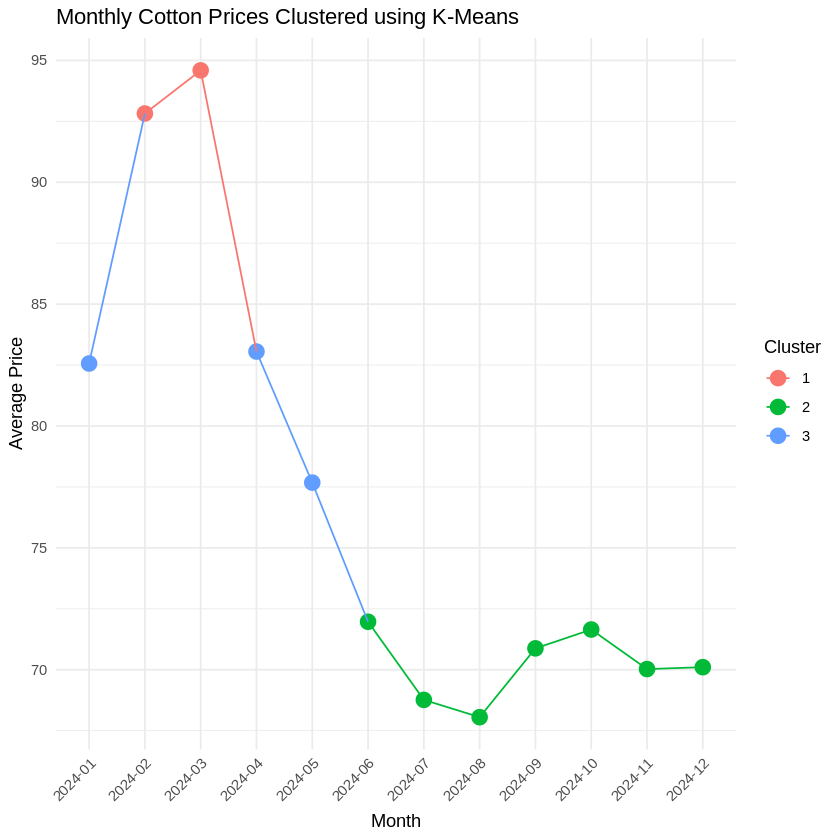

In [ ]:
library(quantmod)
library(dplyr)
library(ggplot2)

# Step 1: Define the commodity ticker for Cotton Futures on Yahoo Finance
ticker <- "CT=F"  # Cotton Futures ticker symbol

# Step 2: Set the date range
start_date <- "2024-01-01"
end_date <- "2024-12-24"

# Step 3: Fetch the data from Yahoo Finance
cotton_data <- getSymbols(ticker, src = "yahoo", from = start_date, to = end_date, auto.assign = FALSE)

# Step 4: Extract the closing prices
cotton_close <- Cl(cotton_data)
closing_price_data <- data.frame(Date = index(cotton_close), CT.F.Close = coredata(cotton_close))
closing_price_data$Month <- format(as.Date(closing_price_data$Date), "%Y-%m")

# Debug: Inspect data structure
print(head(closing_price_data))
str(closing_price_data)

# Step 5: Aggregate data on a monthly basis
monthly_data <- closing_price_data %>%
  group_by(Month) %>%
  summarise(AveragePrice = mean(CT.F.Close, na.rm = TRUE))  # Correct column name

# Debug: Verify aggregation
print(monthly_data)

# Step 6: Apply k-means clustering
set.seed(123)  # For reproducibility
clusters <- kmeans(monthly_data$AveragePrice, centers = 3)
monthly_data$Cluster <- as.factor(clusters$cluster)

# Step 7: Plot the clustered monthly data
ggplot(monthly_data, aes(x = Month, y = AveragePrice, color = Cluster)) +
  geom_point(size = 4) +
  geom_line(group = 1) +
  labs(title = "Monthly Cotton Prices Clustered using K-Means",
       x = "Month",
       y = "Average Price",
       color = "Cluster") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Print message
cat("Monthly cotton prices clustered and plotted successfully.\n")


        Date ClosingPrice
1 2024-01-02        79.94
2 2024-01-03        80.93
3 2024-01-04        80.12
4 2024-01-05        80.19
5 2024-01-08        80.42
6 2024-01-09        80.73
'data.frame':	248 obs. of  2 variables:
 $ Date        : Date, format: "2024-01-02" "2024-01-03" ...
 $ ClosingPrice: num  79.9 80.9 80.1 80.2 80.4 ...
Daily cotton prices clustered and plotted successfully with daily clusters.


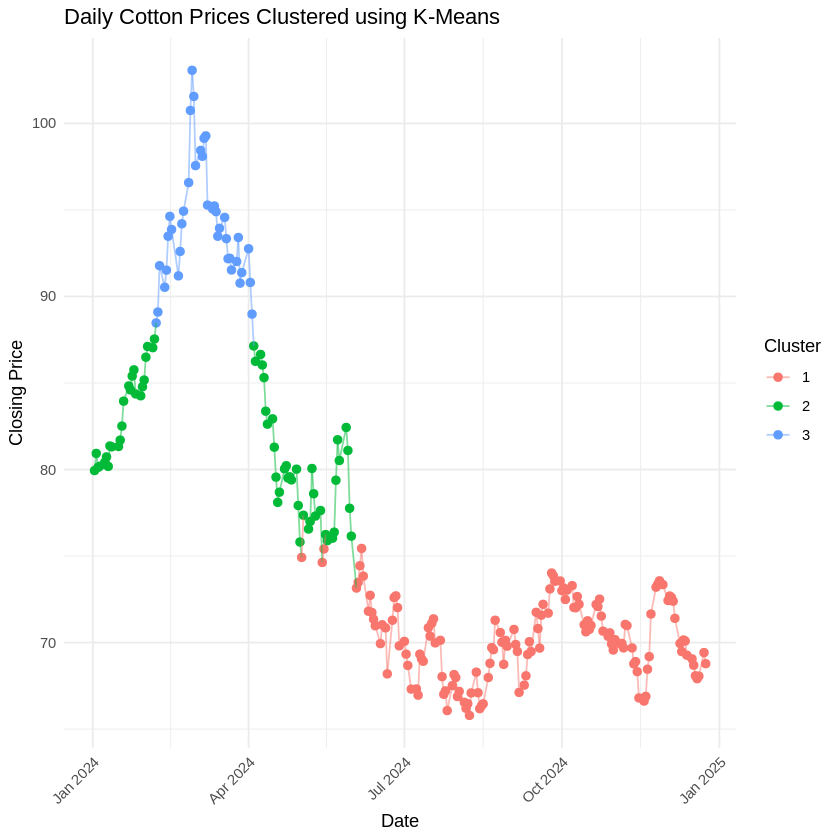

In [ ]:
library(quantmod)
library(dplyr)
library(ggplot2)
library(stats)

# Step 1: Define the commodity ticker for Cotton Futures on Yahoo Finance
ticker <- "CT=F"  # Cotton Futures ticker symbol

# Step 2: Set the date range
start_date <- "2024-01-01"
end_date <- "2024-12-25"

# Step 3: Fetch the data from Yahoo Finance
cotton_data <- getSymbols(ticker, src = "yahoo", from = start_date, to = end_date, auto.assign = FALSE)

# Step 4: Extract the closing prices
cotton_close <- Cl(cotton_data)
closing_price_data <- data.frame(Date = index(cotton_close), ClosingPrice = coredata(cotton_close))

# Correct column naming
colnames(closing_price_data)[2] <- "ClosingPrice"  # Rename to ClosingPrice for consistency

# Debug: Inspect data structure
print(head(closing_price_data))
str(closing_price_data)

# Step 5: Apply k-means clustering on daily data
set.seed(123)  # For reproducibility
clusters <- kmeans(closing_price_data$ClosingPrice, centers = 3)  # Adjust "centers" as needed
closing_price_data$Cluster <- as.factor(clusters$cluster)

# Step 6: Plot the clustered daily data
ggplot(closing_price_data, aes(x = Date, y = ClosingPrice, color = Cluster)) +
  geom_point(size = 2) +
  geom_line(aes(group = 1, color = Cluster), alpha = 0.5) +
  labs(title = "Daily Cotton Prices Clustered using K-Means",
       x = "Date",
       y = "Closing Price",
       color = "Cluster") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))



# Print message
cat("Daily cotton prices clustered and plotted successfully with daily clusters.\n")


        Date Volume
1 2024-01-02  18900
2 2024-01-03  18949
3 2024-01-04  15899
4 2024-01-05  15706
5 2024-01-08  16715
6 2024-01-09  15329
'data.frame':	248 obs. of  2 variables:
 $ Date  : Date, format: "2024-01-02" "2024-01-03" ...
 $ Volume: num  18900 18949 15899 15706 16715 ...
Daily cotton volumes clustered and plotted successfully.


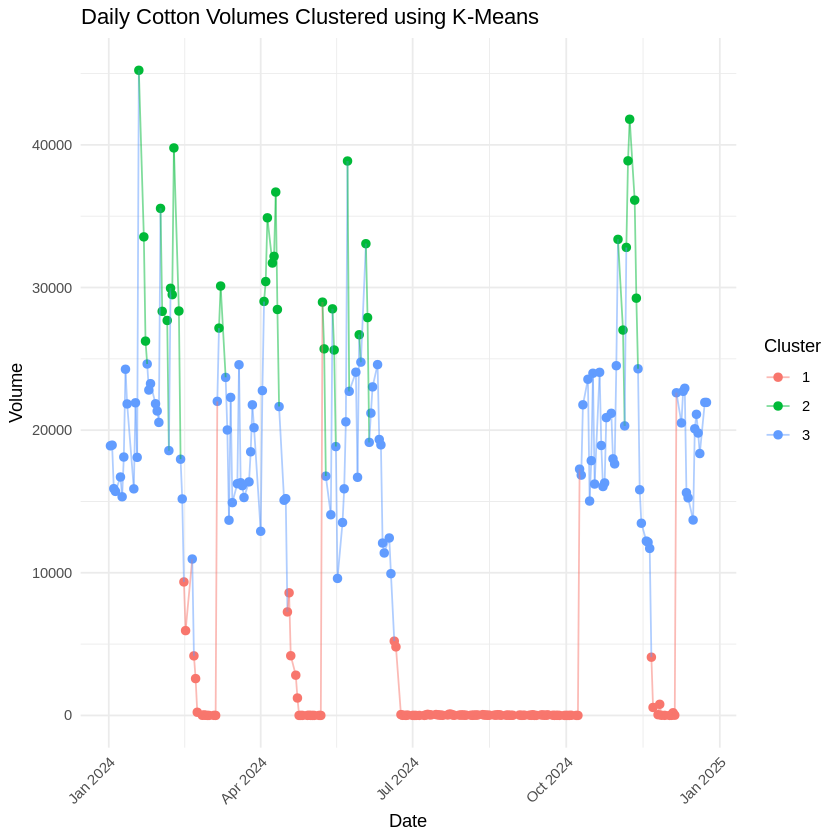

In [ ]:
library(quantmod)
library(dplyr)
library(ggplot2)
library(stats)

# Step 1: Define the commodity ticker for Cotton Futures on Yahoo Finance
ticker <- "CT=F"  # Cotton Futures ticker symbol

# Step 2: Set the date range
start_date <- "2024-01-01"
end_date <- "2024-12-25"

# Step 3: Fetch the data from Yahoo Finance
cotton_data <- getSymbols(ticker, src = "yahoo", from = start_date, to = end_date, auto.assign = FALSE)

# Step 4: Extract the volume data
cotton_volume <- Vo(cotton_data)
volume_data <- data.frame(Date = index(cotton_volume), Volume = coredata(cotton_volume))

# Ensure the column name is correctly handled
colnames(volume_data) <- c("Date", "Volume")

# Step 5: Clean and inspect the data
volume_data <- volume_data %>% filter(!is.na(Volume))  # Remove rows with NA
volume_data$Volume <- as.numeric(volume_data$Volume)   # Ensure Volume is numeric

# Debug: Inspect data structure
print(head(volume_data))
str(volume_data)

# Step 6: Apply k-means clustering on daily volume data
set.seed(123)  # For reproducibility
clusters <- kmeans(volume_data$Volume, centers = 3)  # Adjust "centers" as needed
volume_data$Cluster <- as.factor(clusters$cluster)

# Step 7: Plot the clustered daily volume data
ggplot(volume_data, aes(x = Date, y = Volume, color = Cluster)) +
  geom_point(size = 2) +
  geom_line(aes(group = 1, color = Cluster), alpha = 0.5) +
  labs(title = "Daily Cotton Volumes Clustered using K-Means",
       x = "Date",
       y = "Volume",
       color = "Cluster") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Print message
cat("Daily cotton volumes clustered and plotted successfully.\n")


In [ ]:
cat("The correlation between Volume and Closing Price is:", correlation, "\n")


The correlation between Volume and Closing Price is: 0.3191845 
